In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")



In [19]:
data = pd.read_csv('/Volumes/passion/Stock_Price_Prediction/Stock_Price_prediction/all_stocks_5yr.csv')
print(data.shape)
print(data.sample(7))

(619040, 7)
              date    open      high     low   close   volume Name
234885  2017-09-28   87.36   88.5500   87.22   87.96  1079767  FMC
172540  2017-07-28  114.11  114.8900  112.20  113.18  1406262  DLR
121161  2015-05-08  108.00  108.3500  106.94  107.59   661359  CLX
405506  2015-02-03  110.02  110.4700  109.16  110.24  2160553  NEE
477054  2014-04-28   51.82   51.8600   50.21   51.31  2765788  RCL
237594  2014-03-21  111.95  113.0900  111.12  112.93  1064317  FRT
583258  2015-09-23   56.69   57.2151   56.23   56.87  1846150  VTR


data.info()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [21]:
data['date'] = pd.to_datetime(data['date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [22]:
companies= ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']


Let us consider companies like Google, apple, Nvidia, Facebook distribution of stock price

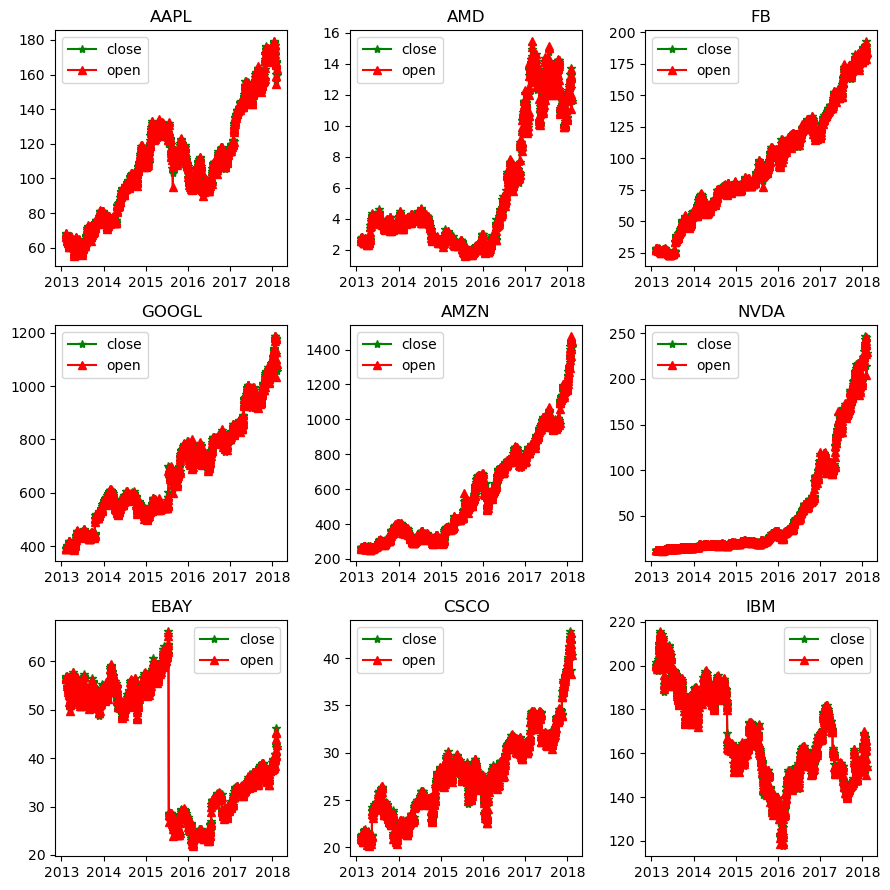

In [23]:
data['data'] = pd.to_datetime(data['date'])
plt.figure(figsize=(9,9))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'],c['close'], c= "g", label="close", marker="*")
    plt.plot(c['date'],c['open'], c= "r", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

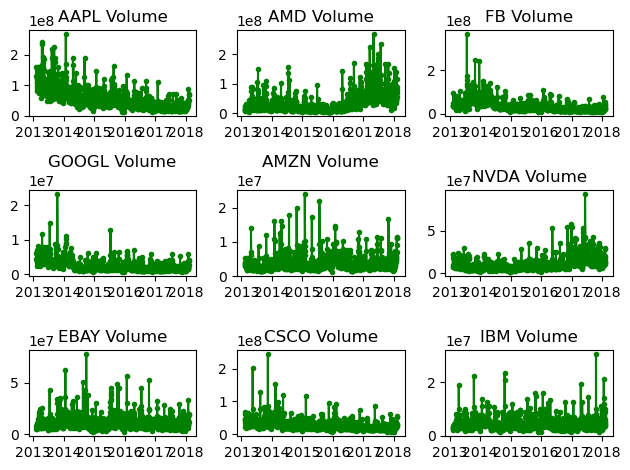

In [24]:
plt.figure(figure=(15,8))
for index, company in enumerate(companies, 1):
    plt.subplot(3,3, index)
    c = data[data['Name']==company]
    plt.plot(c['data'],c['volume'], c='green', marker='.')
    plt.title(f"{company} Volume")
    plt.tight_layout()

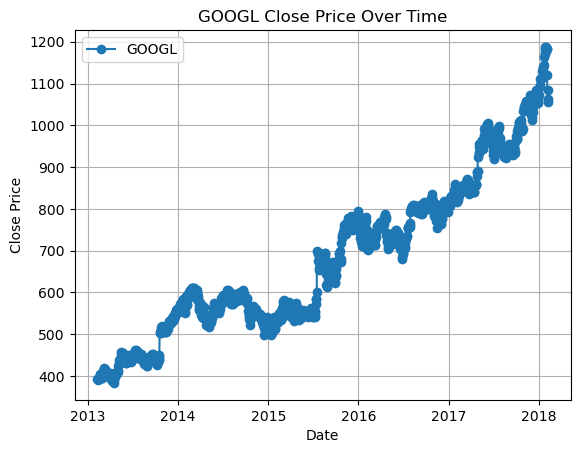

             date       open       high        low      close   volume   Name  \
250308 2013-02-08   390.4551   393.7283   390.1698   393.0777  6031199  GOOGL   
250309 2013-02-11   389.5892   391.8915   387.2619   391.6012  4330781  GOOGL   
250310 2013-02-12   391.2659   394.3440   390.0747   390.7403  3714176  GOOGL   
250311 2013-02-13   390.4551   393.0677   390.3750   391.8214  2393946  GOOGL   
250312 2013-02-14   390.2549   394.7644   389.2739   394.3039  3466971  GOOGL   
...           ...        ...        ...        ...        ...      ...    ...   
251536 2017-12-22  1070.0000  1071.7200  1067.6400  1068.8600   889446  GOOGL   
251537 2017-12-26  1068.6400  1068.8600  1058.6400  1065.8500   918767  GOOGL   
251538 2017-12-27  1066.6000  1068.2700  1058.3800  1060.2000  1116203  GOOGL   
251539 2017-12-28  1062.2500  1064.8400  1053.3800  1055.9500   994249  GOOGL   
251540 2017-12-29  1055.4900  1058.0500  1052.7000  1053.4000  1180340  GOOGL   

             data  
250308 

In [25]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Select only Google data
google = data[data['Name'] == 'GOOGL']

# Filter data within the specified date range
prediction_range = google.loc[(google['date'] > datetime(2013, 1, 1)) & (google['date'] < datetime(2018, 1, 1))]

# Plotting
plt.plot(google['date'], google['close'], marker='o', label='GOOGL')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("GOOGL Close Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Print the filtered prediction range
print(prediction_range)

In [26]:
traning = int(np.ceil(len(google.filter(['close'])) * .95) )
print(traning)

1197


with traning data length we apply features and labels of x_train and y_train

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, validation_data = train_test_split(google, test_size=0.2, shuffle=False)

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the 'close' column of the training data and transform both training and validation data
train_data_scaled = train_data.copy()
train_data_scaled['close'] = scaler.fit_transform(train_data[['close']])

validation_data_scaled = validation_data.copy()
validation_data_scaled['close'] = scaler.transform(validation_data[['close']])

# Print the training and validation data
print("Training Data:")
print(train_data_scaled)
print("\nValidation Data:")
print(validation_data_scaled)

# Plotting the training and validation data
plt.figure(figsize=(10, 5))

# Plot training data
plt.plot(train_data['date'], train_data['close'], marker='o', label='Training Data (Original)')
plt.plot(train_data_scaled['date'], train_data_scaled['close'], marker='o', linestyle='--', label='Training Data (Scaled)')

# Plot validation data
plt.plot(validation_data['date'], validation_data['close'], marker='x', label='Validation Data (Original)')
plt.plot(validation_data_scaled['date'], validation_data_scaled['close'], marker='x', linestyle='--', label='Validation Data (Scaled)')

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("GOOGL Close Price - Training vs Validation Data (Original and Scaled)")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'MinMaxScaler' is not defined

TensorFlow: in Recurrent Neural network, LSTM is used for sequence models and time series data. To stack multiple LSTM in Tensorflow it is mandatory to use return_sequence = True.

In [ ]:
train_data_scaled = train_data.copy()
train_data_scaled['close'] = scaler.fit_transform(train_data[['close']])

validation_data_scaled = validation_data.copy()
validation_data_scaled['close'] = scaler.transform(validation_data[['close']])

# Create sequences for training
def create_sequences(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(x), np.array(y)

# Define lookback period
lookback = 3

# Create sequences from the scaled training data
x_train, y_train = create_sequences(train_data_scaled['close'].values, lookback)

# Reshape the input data to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Define the LSTM model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Model Compilation and Training: essential parameters- 1. Loss, 2. Optimizer, 3. metrics

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs =10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2001   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051


create test data and then model prediction

In [ ]:
# Prepare the test data
training_length = len(train_data)
test_data = scaled_data[training_length - lookback:, :]
x_test = []
y_test = google['close'].values[training_length:]

for i in range(lookback, len(test_data)):
    x_test.append(test_data[i - lookback:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate MSE and RMSE
mse = np.mean((predictions.flatten() - y_test)**2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MSE: 1221.3211933466953
RMSE: 34.947406103267454


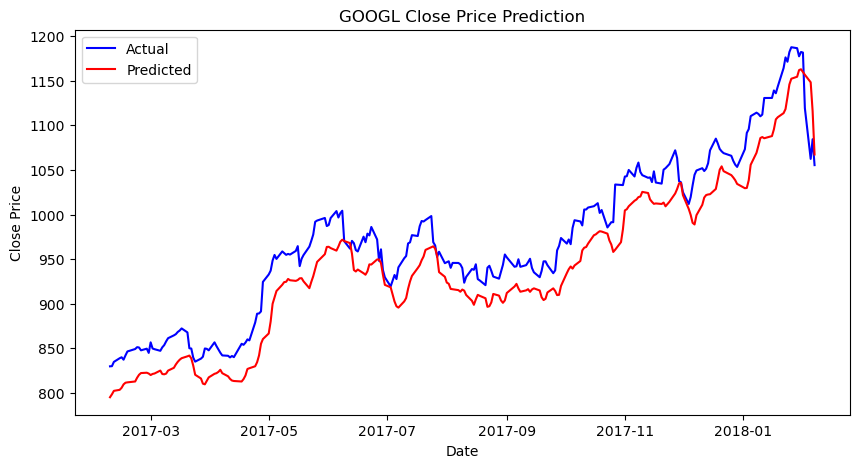

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(google['date'][training_length:], y_test, color='blue', label='Actual')
plt.plot(google['date'][training_length:], predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GOOGL Close Price Prediction')
plt.legend()
plt.show()